In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]



/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
#     vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
#     vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    vmo_slice = vmo.mean(dim='time')
    vhGM_slice = vhGM.mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def find_max_overturning(sfn_basin_resmean, dataset):
#     max_value = sfn_basin_resmean[:,0:49].max()
#     max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
    max_value = sfn_basin_resmean.sel(yq=slice(-30,60)).max()
    max_index = np.where(sfn_basin_resmean.sel(yq=slice(-30,60)) == max_value)
    
    max_depth = dataset.z_l.isel(z_l=max_index[0][0])
    max_lat = dataset.yq.isel(yq=max_index[1][0])

    return(max_value, max_depth, max_lat)


def calc_sigma_wright(salt, temp, press=2000):
    '''Wright EOS density calculation. Default reference pressure is 2000db, but can be set to any pressure.'''

    p = press*10000
    
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    alpha_0 = a0 + a1*temp + a2*salt
    p_0 = b0 + b1*temp + b2*temp**2 + b3*temp**3 + b4*salt + b5*salt*temp
    lam = c0 + c1*temp + c2*temp**2 + c3*temp**3 + c4*salt + c5*salt*temp

    sigma2 = (p+p_0)/(lam + alpha_0*(p+p_0))
    
    if hasattr(temp, 'attrs'):
        sigma2_xarray = temp.copy()
    else:
        sigma2_xarray = salt.copy()
    sigma2_xarray.attrs['units'] = 'kg/m^3' 
    sigma2_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma2_xarray.attrs['standard_name'] = 'sigma2'
    sigma2_xarray.values = sigma2
    
    return sigma2_xarray
#     return sigma2


In [3]:
# test = calc_sigma_wright(35, 10)
# print(test)

### First, calculate AMOC, find max overturning strength, and find max overturning depth

In [4]:
sfn_small_resmean_straight = calculate_basin_sfn(dz_straight.vmo, dz_straight.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_straight, max_depth_straight, max_lat_straight = find_max_overturning(sfn_small_resmean_straight, dz_straight)

print(case_straight)
print(max_ov_straight.values, 'Sv')
print(max_depth_straight.values, 'm')

Straight Coast
28.273693 Sv
1100.0 m


In [5]:
sfn_small_resmean_both = calculate_basin_sfn(dz_both.vmo, dz_both.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_both, max_depth_both, max_lat_both = find_max_overturning(sfn_small_resmean_both, dz_both)

print(case_both)
print(max_ov_both.values, 'Sv')
print(max_depth_both.values, 'm')

Both Coast
34.64018 Sv
1300.0 m


In [6]:
sfn_small_resmean_wide = calculate_basin_sfn(dz_wide.vmo, dz_wide.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_wide, max_depth_wide, max_lat_wide = find_max_overturning(sfn_small_resmean_wide, dz_wide)

print(case_wide)
print(max_ov_wide.values, 'Sv')
print(max_depth_wide.values, 'm')

Wide Coast
38.518505 Sv
1100.0 m


In [7]:
sfn_small_resmean_am = calculate_basin_sfn(dz_am.vmo, dz_am.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_am, max_depth_am, max_lat_am = find_max_overturning(sfn_small_resmean_am, dz_am)

print(case_am)
print(max_ov_am.values, 'Sv')
print(max_depth_am.values, 'm')

America Coast
34.42898 Sv
1200.0 m


In [8]:
sfn_small_resmean_af = calculate_basin_sfn(dz_af.vmo, dz_af.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_af, max_depth_af, max_lat_af = find_max_overturning(sfn_small_resmean_af, dz_af)

print(case_af)
print(max_ov_af.values, 'Sv')
print(max_depth_af.values, 'm')

Africa Coast
28.83817 Sv
1100.0 m


### Now calculate  $\Delta \rho$ for each case

In [9]:
# rho_north_straight = calc_sigma_wright(
#     dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_straight = calc_sigma_wright(
#     dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_straight_tmp = rho_north_straight.copy()
delta_rho_straight_tmp.values = rho_north_straight.values-rho_south_straight.values
delta_rho_straight = delta_rho_straight_tmp.mean(dim='yh').mean(dim='xh')


In [10]:
# rho_north_both = calc_sigma_wright(
#     dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_both = calc_sigma_wright(
#     dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_both_tmp = rho_north_both.copy()
delta_rho_both_tmp.values = rho_north_both.values-rho_south_both.values
delta_rho_both = delta_rho_both_tmp.mean(dim='yh').mean(dim='xh')

In [11]:
# rho_north_wide = calc_sigma_wright(
#     dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_wide = calc_sigma_wright(
#     dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_wide_tmp = rho_north_wide.copy()
delta_rho_wide_tmp.values = rho_north_wide.values-rho_south_wide.values
delta_rho_wide = delta_rho_wide_tmp.mean(dim='yh').mean(dim='xh')

In [12]:
# rho_north_am = calc_sigma_wright(
#     dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_am = calc_sigma_wright(
#     dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_am_tmp = rho_north_am.copy()
delta_rho_am_tmp.values = rho_north_am.values-rho_south_am.values
delta_rho_am = delta_rho_am_tmp.mean(dim='yh').mean(dim='xh')

In [13]:
# rho_north_af = calc_sigma_wright(
#     dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_af = calc_sigma_wright(
#     dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_af_tmp = rho_north_af.copy()
delta_rho_af_tmp.values = rho_north_af.values-rho_south_af.values
delta_rho_af = delta_rho_af_tmp.mean(dim='yh').mean(dim='xh')

### Predicted AMOC strength from Butler et al 2016

In [14]:
## flip the delta rho arrays to integrate from depth to surface instead of the other way around

delta_rho_straight = delta_rho_straight[::-1]
delta_rho_both = delta_rho_both[::-1]
delta_rho_wide = delta_rho_wide[::-1]
delta_rho_am = delta_rho_am[::-1]
delta_rho_af = delta_rho_af[::-1]

In [15]:
# Set constants for the calculation here

# Lx = average zonal width of basin. 
# Come back and do this more rigorously!
# Lx_straight = 8000000 # 8991000 # m
# Lx_both = 9000000  #10545000 #11433000  # m
# Lx_am = 9000000 #10545000      # m
# Lx_af = 8000000 #8991000 #9879000       # m
# Lx_wide = 11500000 # 11433000    # m

# Lx_straight = 7e6 # 8991000 # m
# Lx_wide = 9.3e6 # 11433000    # m
# Lx_both = 9.4e6  #10545000 #11433000  # m
# Lx_am = 8.5e6 #10545000      # m
# Lx_af = 8e6 #8991000 #9879000       # m

##### average basin width between 20N and 60N
Lx_straight = 7.5e6  # m
Lx_wide = 9.2e6    # m
Lx_both = 9e6    # m
Lx_am = 9e6      # m
Lx_af = 7e6        # m



##### These don't get used until later for plotting stuff
Lx_n_straight = 4.5e6  # m
Lx_n_wide = 5.8e6    # m
Lx_n_both = 4.5e6   # m
Lx_n_am = 4.5e6      # m
Lx_n_af = 4.5e6        # m

Lx_s_straight = 7.7e6  # m
Lx_s_wide = 10e6  # m
Lx_s_both = 11e6    # m
Lx_s_am = 8.7e6      # m
Lx_s_af = 10e6        # m
#####

dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

c_rho = 0.94
g = 9.81
rho_0 = 1035
f_0 = 1e-4
# Ly = (60)*111000 # uncomment if doing density diff from north to eq
Ly = (60+31)*111000 # uncomment if doing density diff from north to southern extent of Africa

constant = c_rho*g/(rho_0*f_0*Ly)

h = delta_rho_straight.zl.isel(zl=0)

# latitude bounds for model output maximum overturning for comparison with predicted overturning

# lat_s = -30
lat_s = 20
lat_n = 60

In [16]:
# Straight Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_straight = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_straight = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_straight[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_straight = constant * (term1_straight - term2_straight)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_straight_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (Vz_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_straight_tmp[i] = integ.values

Psi_straight = (Psi_straight_tmp*Lx_straight)/(1e6)

print(Psi_straight.max())

max_index = np.where(Psi_straight == Psi_straight.max())
    
Psi_max_depth_straight = Psi_straight.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_straight)


<xarray.DataArray 'thetao' ()>
array(26.87676535)
<xarray.DataArray 'zl' ()>
array(1000.)
Coordinates:
    zl       float64 1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


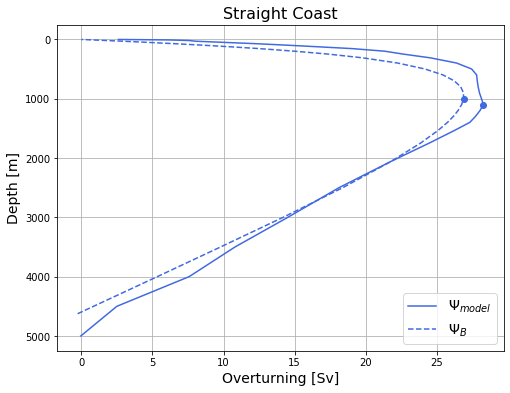

<xarray.DataArray 'vmo' ()>
array(28.273693, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [17]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_straight = []

sfn_straight = sfn_small_resmean_straight.sel(yq=slice(lat_s,lat_n))

psi_max_straight = np.amax(sfn_straight, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_straight, sfn_small_resmean_straight.z_l, color='royalblue', label='$\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, color='royalblue', linestyle='dashed', label='$\Psi_{B}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_straight, fontsize=16)
plt.show()

print(psi_max_straight.max(), 'Sv')
print(max_depth_straight)

In [18]:
# Both Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

# c_rho = 0.87
# constant = c_rho*g/(rho_0*f_0*Ly)

term1_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_both = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_both = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_both[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_both = constant * (term1_both - term2_both)


# Psi_p = Lx * integral from z to 0 of Vz 
Psi_both_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (Vz_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_both_tmp[i] = integ.values

Psi_both = (Psi_both_tmp*Lx_both)/(1e6)

print(Psi_both.max())

max_index = np.where(Psi_both == Psi_both.max())
    
Psi_max_depth_both = Psi_both.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_both)


<xarray.DataArray 'thetao' ()>
array(37.80204716)
<xarray.DataArray 'zl' ()>
array(1000.)
Coordinates:
    zl       float64 1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


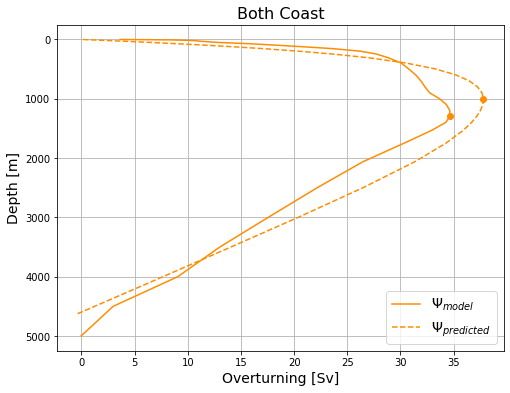

<xarray.DataArray 'vmo' ()>
array(34.64018, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1300.)
Coordinates:
    z_l      float64 1.3e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [19]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_both = []

sfn_both = sfn_small_resmean_both.sel(yq=slice(lat_s,lat_n))

psi_max_both = np.amax(sfn_both, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_both, sfn_small_resmean_both.z_l, color='darkorange', label='$\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, color='darkorange', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_both, fontsize=16)
plt.show()

print(psi_max_both.max(), 'Sv')
print(max_depth_both)

In [20]:
# Wide Straight calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_wide = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_wide = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_wide[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_wide = constant * (term1_wide - term2_wide)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_wide_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (Vz_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_wide_tmp[i] = integ.values

Psi_wide = (Psi_wide_tmp*Lx_wide)/(1e6)

print(Psi_wide.max())

max_index = np.where(Psi_wide == Psi_wide.max())
    
Psi_max_depth_wide = Psi_wide.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_wide)


<xarray.DataArray 'thetao' ()>
array(40.26526699)
<xarray.DataArray 'zl' ()>
array(1200.)
Coordinates:
    zl       float64 1.2e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


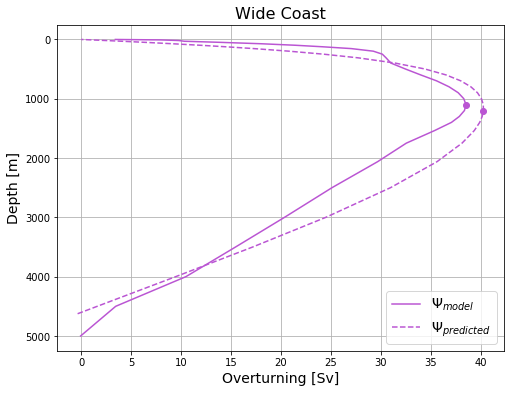

<xarray.DataArray 'vmo' ()>
array(38.518505, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [21]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_wide = []

sfn_wide = sfn_small_resmean_wide.sel(yq=slice(lat_s,lat_n))

psi_max_wide = np.amax(sfn_wide, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_wide, sfn_small_resmean_wide.z_l, color='mediumorchid', label='$\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, color='mediumorchid', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_wide, fontsize=16)
plt.show()

print(psi_max_wide.max(), 'Sv')
print(max_depth_wide)

In [22]:
# America Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_am = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_am = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_am[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_am = constant * (term1_am - term2_am)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_am_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (Vz_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_am_tmp[i] = integ.values

Psi_am = (Psi_am_tmp*Lx_am)/(1e6)

print(Psi_am.max())

max_index = np.where(Psi_am == Psi_am.max())
    
Psi_max_depth_am = Psi_am.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_am)


<xarray.DataArray 'thetao' ()>
array(36.61013006)
<xarray.DataArray 'zl' ()>
array(1100.)
Coordinates:
    zl       float64 1.1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


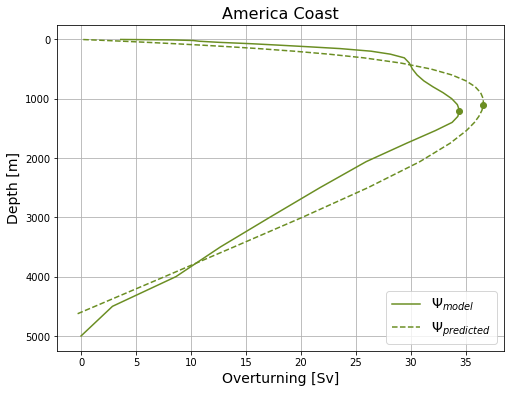

<xarray.DataArray 'vmo' ()>
array(34.42898, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1200.)
Coordinates:
    z_l      float64 1.2e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [23]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_am = []

sfn_am = sfn_small_resmean_am.sel(yq=slice(lat_s,lat_n))

psi_max_am = np.amax(sfn_am, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_am, sfn_small_resmean_am.z_l, color='olivedrab', label='$\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, color='olivedrab', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_am, fontsize=16)
plt.show()

print(psi_max_am.max(), 'Sv')
print(max_depth_am)

In [24]:
# Africa Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rhoterm1_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_af = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_af = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_af[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_af = constant * (term1_af - term2_af)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_af_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (Vz_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_af_tmp[i] = integ.values

Psi_af = (Psi_af_tmp*Lx_af)/(1e6)

print(Psi_af.max())

max_index = np.where(Psi_af == Psi_af.max())
    
Psi_max_depth_af = Psi_af.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_af)


<xarray.DataArray 'thetao' ()>
array(27.05610923)
<xarray.DataArray 'zl' ()>
array(900.)
Coordinates:
    zl       float64 900.0
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


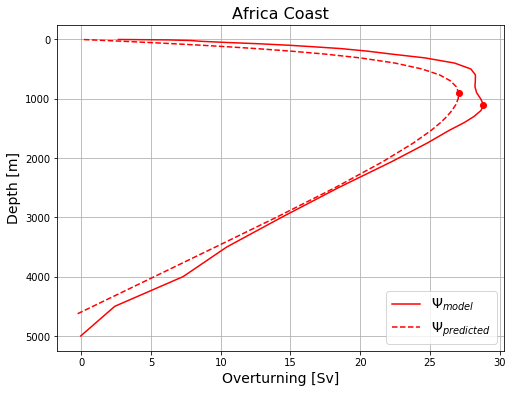

<xarray.DataArray 'vmo' ()>
array(28.83817, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [25]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_af = []

sfn_af = sfn_small_resmean_af.sel(yq=slice(lat_s,lat_n))

psi_max_af = np.amax(sfn_af, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_af, sfn_small_resmean_af.z_l, color='r', label='$\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, color='r', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_af, fontsize=16)
plt.show()

print(psi_max_af.max(), 'Sv')
print(max_depth_af)

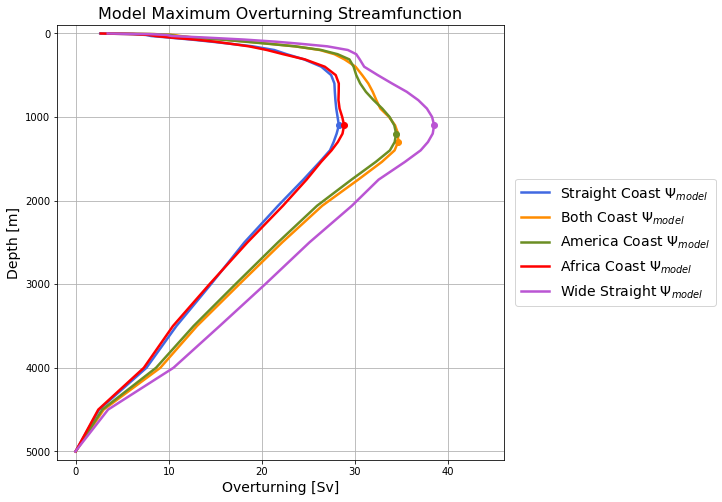

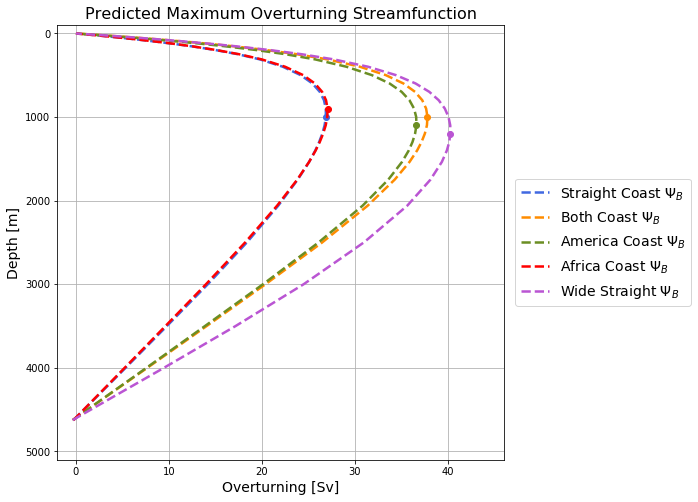

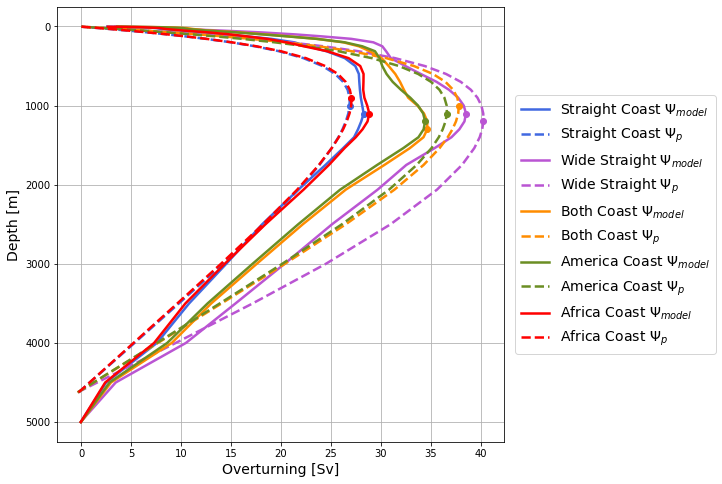

In [26]:
width = 2.5

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(psi_max_straight, psi_max_straight.z_l, 
        color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(psi_max_both, psi_max_both.z_l, 
        color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(psi_max_am, psi_max_am.z_l, 
        color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(psi_max_af, psi_max_af.z_l, 
        color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)

ax.plot(psi_max_wide, psi_max_wide.z_l, 
        color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)

plt.xlim([-2, 46]), plt.ylim([-100, 5100])
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Model Maximum Overturning Streamfunction', fontsize=16)
plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.plot(Psi_straight, Psi_straight.zl, 
        color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{B}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(Psi_both, Psi_both.zl, 
        color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{B}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(Psi_am, Psi_am.zl, 
        color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{B}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(Psi_af, Psi_af.zl, 
        color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{B}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)

ax.plot(Psi_wide, Psi_wide.zl, 
        color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{B}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)

plt.xlim([-2, 46]), plt.ylim([-100, 5100])
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Predicted Maximum Overturning Streamfunction', fontsize=16)
plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.plot(psi_max_straight, psi_max_straight.z_l, 
        color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, 
        color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{p}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(psi_max_wide, psi_max_wide.z_l, 
        color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, 
        color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{p}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)


ax.plot(psi_max_both, psi_max_both.z_l, 
        color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, 
        color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{p}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(psi_max_am, psi_max_am.z_l, 
        color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, 
        color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{p}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(psi_max_af, psi_max_af.z_l, 
        color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, 
        color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{p}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)

plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

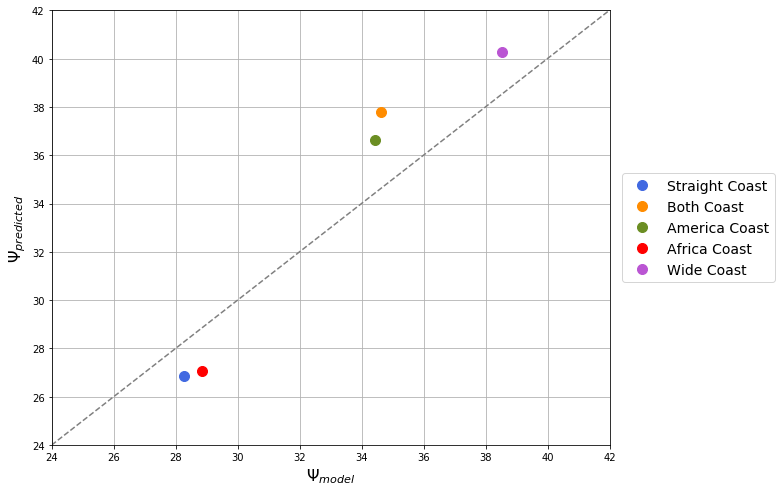

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(psi_max_straight.max(), Psi_straight.max(), 'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(psi_max_both.max(), Psi_both.max(), 'o', color='darkorange', markersize=10, label=case_both)
ax.plot(psi_max_am.max(), Psi_am.max(), 'o', color='olivedrab', markersize=10, label=case_am)
ax.plot(psi_max_af.max(), Psi_af.max(), 'o', color='r', markersize=10, label=case_af)
ax.plot(psi_max_wide.max(), Psi_wide.max(), 'o', color='mediumorchid', markersize=10, label=case_wide)
plt.xlabel('$\Psi_{model}$', fontsize=16), plt.ylabel('$\Psi_{predicted}$', fontsize=16)
plt.grid()
plt.plot([24,45], [24,45], color='gray', linestyle='dashed')
plt.xlim([24,42]), plt.ylim([24,42])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

# plot the 1 to 1 line

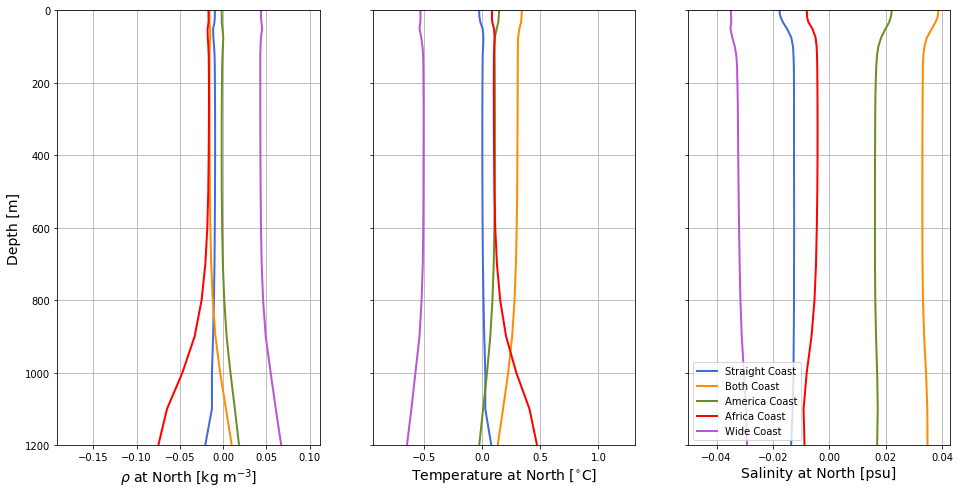

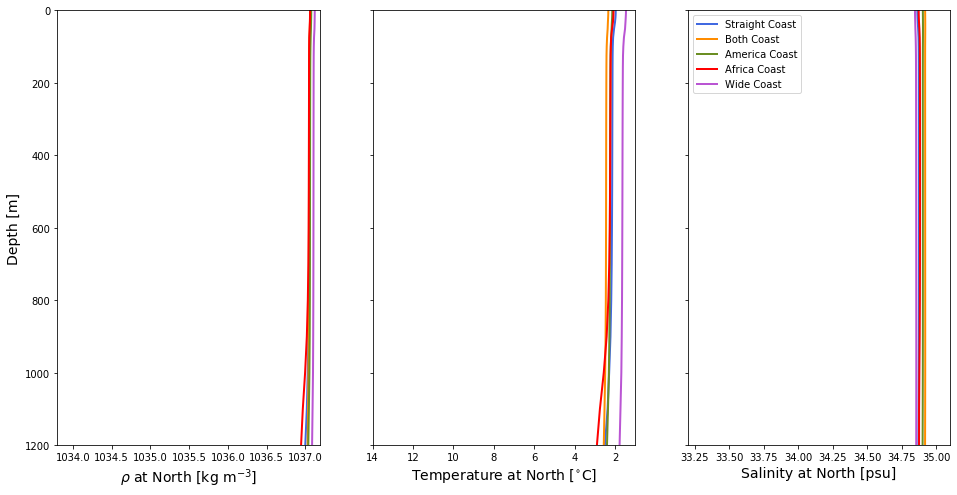

In [28]:
mean_rho_north = (rho_north_straight.mean(dim='yh').mean(dim='xh') + 
                  rho_north_both.mean(dim='yh').mean(dim='xh') + 
                  rho_north_am.mean(dim='yh').mean(dim='xh') + 
                  rho_north_af.mean(dim='yh').mean(dim='xh') + 
                  rho_north_wide.mean(dim='yh').mean(dim='xh'))/5

temp_north_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_both = dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_am = dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_wide = dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')

mean_temp_north = (temp_north_straight.mean(dim='yh').mean(dim='xh') +
                  temp_north_both.mean(dim='yh').mean(dim='xh') + 
                  temp_north_am.mean(dim='yh').mean(dim='xh') +
                  temp_north_af.mean(dim='yh').mean(dim='xh') +
                  temp_north_wide.mean(dim='yh').mean(dim='xh')) / 5

salt_north_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_both = dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_am = dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_wide = dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')

mean_salt_north = (salt_north_straight.mean(dim='yh').mean(dim='xh') +
                  salt_north_both.mean(dim='yh').mean(dim='xh') +
                  salt_north_am.mean(dim='yh').mean(dim='xh') +
                  salt_north_af.mean(dim='yh').mean(dim='xh') +
                  salt_north_wide.mean(dim='yh').mean(dim='xh')) / 5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_north_straight.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_north_both.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_north_am.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_north_af.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_north_wide.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at North [kg m$^{-3}$]', fontsize=14)
ax[0].grid()

ax[1].plot(temp_north_straight.mean(dim='yh').mean(dim='xh')-mean_temp_north, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_north_both.mean(dim='yh').mean(dim='xh')-mean_temp_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_north_am.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_north_af.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_north_wide.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at North [$^{\circ}$C]', fontsize=14)
ax[1].grid()

ax[2].plot(salt_north_straight.mean(dim='yh').mean(dim='xh')-mean_salt_north, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_north_both.mean(dim='yh').mean(dim='xh')-mean_salt_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_north_am.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_north_af.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_north_wide.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at North [psu]', fontsize=14)
ax[2].grid()

plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()


fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_north_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_north_am.mean(dim='yh').mean(dim='xh'), 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_north_af.mean(dim='yh').mean(dim='xh'), 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_north_wide.mean(dim='yh').mean(dim='xh'), 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at North [kg m$^{-3}$]', fontsize=14)
ax[0].set_xlim([1033.8,1037.19])
# ax[0].grid()

ax[1].plot(temp_north_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_north_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_north_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_north_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_north_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at North [$^{\circ}$C]', fontsize=14)
ax[1].set_xlim([1,14])
ax[1].invert_xaxis()
# ax[1].grid()

ax[2].plot(salt_north_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_north_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_north_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_north_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_north_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at North [psu]', fontsize=14)
ax[2].set_xlim([33.2,35.1])
# ax[2].grid()

plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()


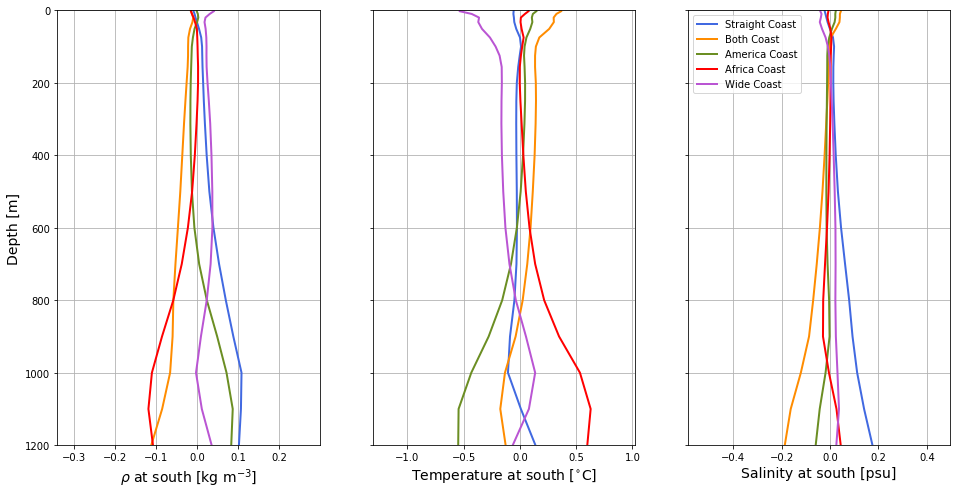

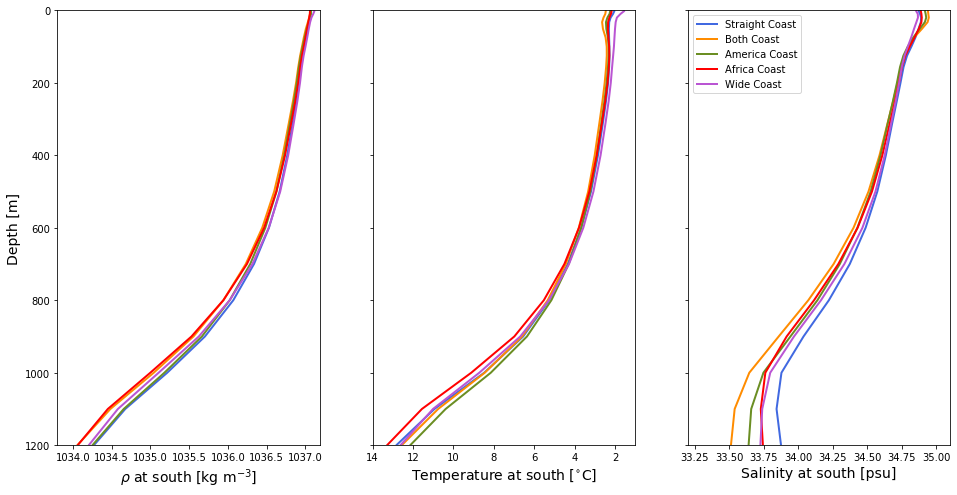

In [29]:
mean_rho_south = (rho_south_straight.mean(dim='yh').mean(dim='xh') + 
                  rho_south_both.mean(dim='yh').mean(dim='xh') + 
                  rho_south_am.mean(dim='yh').mean(dim='xh') + 
                  rho_south_af.mean(dim='yh').mean(dim='xh') + 
                  rho_south_wide.mean(dim='yh').mean(dim='xh'))/5

temp_south_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_both = dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_am = dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_wide = dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')

mean_temp_south = (temp_south_straight.mean(dim='yh').mean(dim='xh') +
                  temp_south_both.mean(dim='yh').mean(dim='xh') + 
                  temp_south_am.mean(dim='yh').mean(dim='xh') +
                  temp_south_af.mean(dim='yh').mean(dim='xh') +
                  temp_south_wide.mean(dim='yh').mean(dim='xh')) / 5

salt_south_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_both = dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_am = dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_wide = dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')

mean_salt_south = (salt_south_straight.mean(dim='yh').mean(dim='xh') +
                  salt_south_both.mean(dim='yh').mean(dim='xh') +
                  salt_south_am.mean(dim='yh').mean(dim='xh') +
                  salt_south_af.mean(dim='yh').mean(dim='xh') +
                  salt_south_wide.mean(dim='yh').mean(dim='xh')) / 5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_south_straight.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_south_both.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_south_am.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_south_af.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_south_wide.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at south [kg m$^{-3}$]', fontsize=14)
ax[0].grid()

ax[1].plot(temp_south_straight.mean(dim='yh').mean(dim='xh')-mean_temp_south, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_south_both.mean(dim='yh').mean(dim='xh')-mean_temp_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_south_am.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_south_af.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_south_wide.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at south [$^{\circ}$C]', fontsize=14)
ax[1].grid()

ax[2].plot(salt_south_straight.mean(dim='yh').mean(dim='xh')-mean_salt_south, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_south_both.mean(dim='yh').mean(dim='xh')-mean_salt_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_south_am.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_south_af.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_south_wide.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at south [psu]', fontsize=14)
ax[2].grid()

plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_south_am.mean(dim='yh').mean(dim='xh'), 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_south_af.mean(dim='yh').mean(dim='xh'), 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_south_wide.mean(dim='yh').mean(dim='xh'), 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at south [kg m$^{-3}$]', fontsize=14)
ax[0].set_xlim([1033.8,1037.19])
# ax[0].grid()

ax[1].plot(temp_south_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_south_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_south_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_south_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at south [$^{\circ}$C]', fontsize=14)
ax[1].set_xlim([1,14])
ax[1].invert_xaxis()
# ax[1].grid()

ax[2].plot(salt_south_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_south_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_south_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_south_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at south [psu]', fontsize=14)
ax[2].set_xlim([33.2,35.1])
# ax[2].grid()

plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

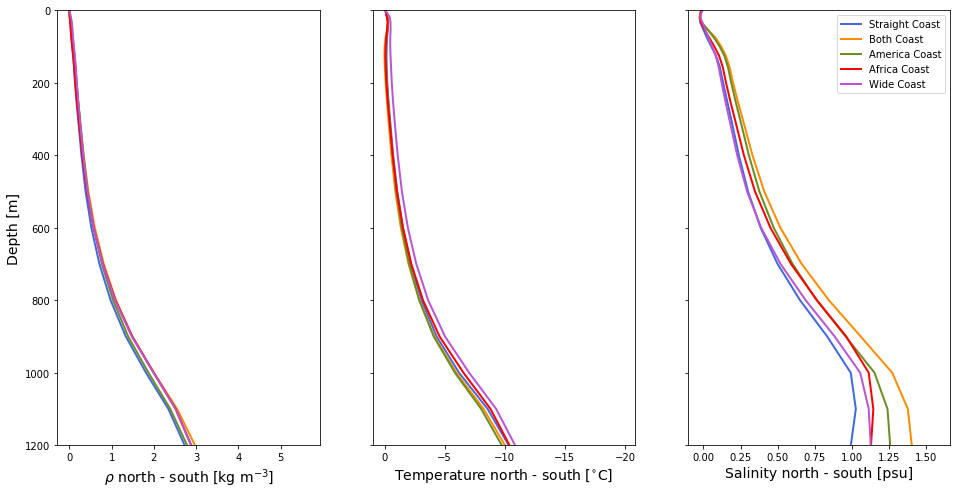

In [30]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_north_straight.mean(dim='yh').mean(dim='xh')-rho_south_straight.mean(dim='yh').mean(dim='xh'), 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_north_both.mean(dim='yh').mean(dim='xh')-rho_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_north_am.mean(dim='yh').mean(dim='xh')-rho_south_am.mean(dim='yh').mean(dim='xh'), 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_north_af.mean(dim='yh').mean(dim='xh')-rho_south_af.mean(dim='yh').mean(dim='xh'), 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_north_wide.mean(dim='yh').mean(dim='xh')-rho_south_wide.mean(dim='yh').mean(dim='xh'), 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ north - south [kg m$^{-3}$]', fontsize=14)
# ax[0].set_xlim([1033.8,1037.19])
# ax[0].grid()

ax[1].plot(temp_north_straight.mean(dim='yh').mean(dim='xh')-temp_south_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_north_both.mean(dim='yh').mean(dim='xh')-temp_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_north_am.mean(dim='yh').mean(dim='xh')-temp_south_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_north_af.mean(dim='yh').mean(dim='xh')-temp_south_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_north_wide.mean(dim='yh').mean(dim='xh')-temp_south_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature north - south [$^{\circ}$C]', fontsize=14)
# ax[1].set_xlim([1,14])
ax[1].invert_xaxis()
# ax[1].grid()

ax[2].plot(salt_north_straight.mean(dim='yh').mean(dim='xh')-salt_south_straight.mean(dim='yh').mean(dim='xh'), 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_north_both.mean(dim='yh').mean(dim='xh')-salt_south_both.mean(dim='yh').mean(dim='xh'), 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_north_am.mean(dim='yh').mean(dim='xh')-salt_south_am.mean(dim='yh').mean(dim='xh'),  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_north_af.mean(dim='yh').mean(dim='xh')-salt_south_af.mean(dim='yh').mean(dim='xh'),  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_north_wide.mean(dim='yh').mean(dim='xh')-salt_south_wide.mean(dim='yh').mean(dim='xh'),  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity north - south [psu]', fontsize=14)
# ax[2].set_xlim([33.2,35.1])
# ax[2].grid()

plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

In [31]:
# double integral calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

def double_integration(delta_rho):
#     term1_tmp = xr.zeros_like(delta_rho)
    
#     for i in range(len(delta_rho.zl)):
#         integ = (delta_rho*dz).isel(zl=slice(i,-1)).sum(dim='zl')
#         term1_tmp[i] = integ.values

#     term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

#     #term2 = integral from z to 0 of delta rho
    
    term2 = xr.zeros_like(delta_rho)

    for i in range(len(delta_rho.zl)):
        integ = (delta_rho*dz).isel(zl=slice(i,-1)).sum(dim='zl')
        term2[i] = integ.values

#     # V(z) = constant * (term1 - term2)
#     Vz = constant * (term1 - term2)

#     # Psi_p = Lx * integral from z to 0 of Vz 
    Psi_tmp = xr.zeros_like(delta_rho)

#     for i in range(len(delta_rho.zl)):
#         integ = (Vz*dz).isel(zl=slice(i,-1)).sum(dim='zl')
#         Psi_tmp[i] = integ.values
    
    for i in range(len(delta_rho.zl)):
        integ = (term2*dz).isel(zl=slice(i,-1)).sum(dim='zl')
        Psi_tmp[i] = integ.values

#     Psi = (Psi_tmp*Lx)/(1e6)
    double_integral = Psi_tmp
#     print(Psi.max())

    max_index = np.where(double_integral == double_integral.max())

    double_integral_max_depth = double_integral.zl.isel(zl=max_index[0][0])
#     print(Psi_max_depth)
    return(double_integral, double_integral_max_depth)


In [32]:
# Northern point density double integral
north_straight = rho_north_straight.mean(dim='yh').mean(dim='xh')
north_wide = rho_north_wide.mean(dim='yh').mean(dim='xh')
north_both = rho_north_both.mean(dim='yh').mean(dim='xh')
north_am = rho_north_am.mean(dim='yh').mean(dim='xh')
north_af = rho_north_af.mean(dim='yh').mean(dim='xh')

rho_n_dint_straight, rho_n_dint_depth_straight = double_integration(north_straight[::-1])
rho_north_dint_straight = rho_n_dint_straight.sel(zl=Psi_max_depth_straight)

rho_n_dint_wide, rho_n_dint_depth_wide = double_integration(north_wide[::-1])
rho_north_dint_wide = rho_n_dint_wide.sel(zl=Psi_max_depth_wide)

rho_n_dint_both, rho_n_dint_depth_both = double_integration(north_both[::-1])
rho_north_dint_both = rho_n_dint_both.sel(zl=Psi_max_depth_both)

rho_n_dint_am, rho_n_dint_depth_am = double_integration(north_am[::-1])
rho_north_dint_am = rho_n_dint_am.sel(zl=Psi_max_depth_am)

rho_n_dint_af, rho_n_dint_depth_af = double_integration(north_af[::-1])
rho_north_dint_af = rho_n_dint_af.sel(zl=Psi_max_depth_af)

# Southern point density double integral
south_straight = rho_south_straight.mean(dim='yh').mean(dim='xh')
south_wide = rho_south_wide.mean(dim='yh').mean(dim='xh')
south_both = rho_south_both.mean(dim='yh').mean(dim='xh')
south_am = rho_south_am.mean(dim='yh').mean(dim='xh')
south_af = rho_south_af.mean(dim='yh').mean(dim='xh')

rho_s_dint_straight, rho_s_dint_depth_straight = double_integration(south_straight[::-1])
rho_south_dint_straight = rho_s_dint_straight.sel(zl=Psi_max_depth_straight)

rho_s_dint_wide, rho_s_dint_depth_wide = double_integration(south_wide[::-1])
rho_south_dint_wide = rho_s_dint_wide.sel(zl=Psi_max_depth_wide)

rho_s_dint_both, rho_s_dint_depth_both = double_integration(south_both[::-1])
rho_south_dint_both = rho_s_dint_both.sel(zl=Psi_max_depth_both)

rho_s_dint_am, rho_s_dint_depth_am = double_integration(south_am[::-1])
rho_south_dint_am = rho_s_dint_am.sel(zl=Psi_max_depth_am)

rho_s_dint_af, rho_s_dint_depth_af = double_integration(south_af[::-1])
rho_south_dint_af = rho_s_dint_af.sel(zl=Psi_max_depth_af)

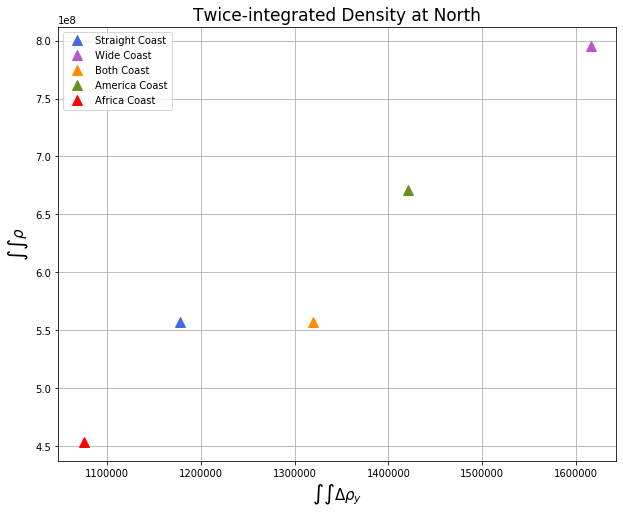

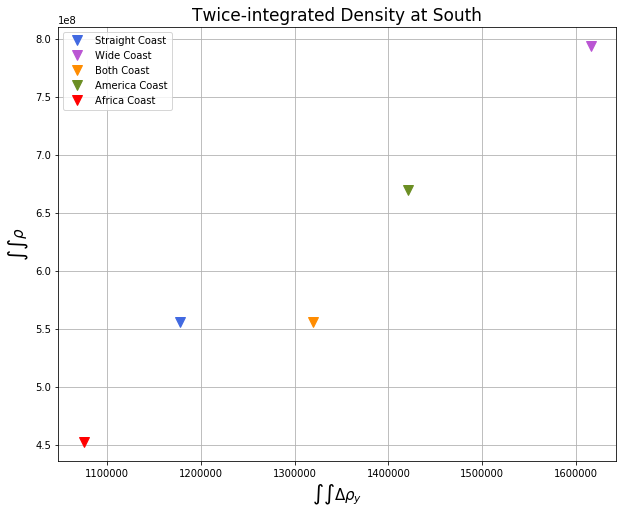

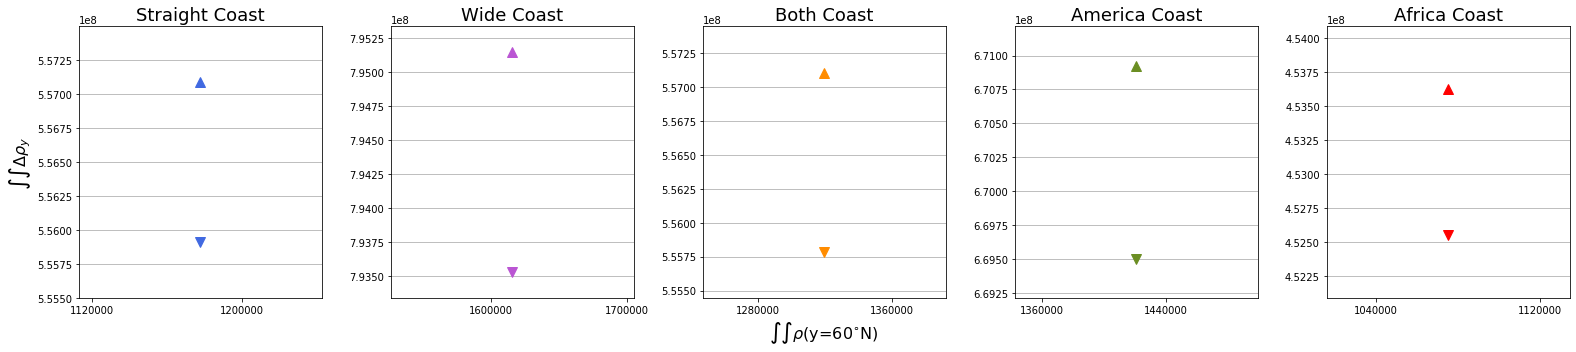

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_north_dint_straight-rho_south_dint_straight, rho_north_dint_straight, '^',
        label='{}'.format(case_straight), color='royalblue', markersize=10)
ax.plot(rho_north_dint_wide-rho_south_dint_wide, rho_north_dint_wide, '^',
        label='{}'.format(case_wide), color='mediumorchid', markersize=10)
ax.plot(rho_north_dint_both-rho_south_dint_both, rho_north_dint_both, '^',
        label='{}'.format(case_both), color='darkorange', markersize=10)
ax.plot(rho_north_dint_am-rho_south_dint_am, rho_north_dint_am, '^',
        label='{}'.format(case_am), color='olivedrab', markersize=10)
ax.plot(rho_north_dint_af-rho_south_dint_af, rho_north_dint_af, '^',
        label='{}'.format(case_af), color='r', markersize=10)
plt.legend(); plt.grid()
plt.ylabel(r'$\int \int \rho$', fontsize=15)
plt.xlabel(r'$\int \int \Delta \rho_y$', fontsize=15)
plt.title('Twice-integrated Density at North', fontsize=17)
plt.show()



fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_north_dint_straight-rho_south_dint_straight, rho_south_dint_straight, 'v',
        label='{}'.format(case_straight), color='royalblue', markersize=10)
ax.plot(rho_north_dint_wide-rho_south_dint_wide, rho_south_dint_wide, 'v',
        label='{}'.format(case_wide), color='mediumorchid', markersize=10)
ax.plot(rho_north_dint_both-rho_south_dint_both, rho_south_dint_both, 'v',
        label='{}'.format(case_both), color='darkorange', markersize=10)
ax.plot(rho_north_dint_am-rho_south_dint_am, rho_south_dint_am, 'v',
        label='{}'.format(case_am), color='olivedrab', markersize=10)
ax.plot(rho_north_dint_af-rho_south_dint_af, rho_south_dint_af, 'v',
        label='{}'.format(case_af), color='r', markersize=10)
plt.legend(); plt.grid()
plt.ylabel(r'$\int \int \rho$', fontsize=15)
plt.xlabel(r'$\int \int \Delta \rho_y$', fontsize=15)
plt.title('Twice-integrated Density at South', fontsize=17)
plt.show()


mod = 1e6

fig, ax = plt.subplots(ncols=5, figsize=(22,5))

ax[0].plot(rho_north_dint_straight-rho_south_dint_straight, rho_north_dint_straight, '^',
        label='{}'.format(case_straight), color='royalblue', markersize=10)
ax[0].plot(rho_north_dint_straight-rho_south_dint_straight, rho_south_dint_straight, 'v',
        label='{}'.format(case_straight), color='royalblue', markersize=10)
# ax[0].set_ylim([5.5806e9, 5.5814e9])
ax[0].set_ylim([(rho_north_dint_straight+rho_south_dint_straight)/2 - mod, 
                (rho_north_dint_straight+rho_south_dint_straight)/2 + mod])
ax[0].set_ylabel(r'$\int \int \Delta \rho_y$', fontsize=16)

ax[1].plot(rho_north_dint_wide-rho_south_dint_wide, rho_north_dint_wide, '^',
        label='{}'.format(case_wide), color='mediumorchid', markersize=10)
ax[1].plot(rho_north_dint_wide-rho_south_dint_wide, rho_south_dint_wide, 'v',
        label='{}'.format(case_wide), color='mediumorchid', markersize=10)
# ax[1].set_ylim([4.9481e9, 4.9489e9])

ax[1].set_ylim([(rho_north_dint_wide+rho_south_dint_wide)/2 - mod, 
                (rho_north_dint_wide+rho_south_dint_wide)/2 + mod])

ax[2].plot(rho_north_dint_both-rho_south_dint_both, rho_north_dint_both, '^',
        label='{}'.format(case_both), color='darkorange', markersize=10)
ax[2].plot(rho_north_dint_both-rho_south_dint_both, rho_south_dint_both, 'v',
        label='{}'.format(case_both), color='darkorange', markersize=10)
# ax[2].set_ylim([5.5806e9, 5.5814e9])
ax[2].set_ylim([(rho_north_dint_both+rho_south_dint_both)/2 - mod, 
                (rho_north_dint_both+rho_south_dint_both)/2 + mod])
ax[2].set_xlabel(r'$\int \int \rho$(y=60$^{\circ}$N)', fontsize=16)

ax[3].plot(rho_north_dint_am-rho_south_dint_am, rho_north_dint_am, '^',
        label='{}'.format(case_am), color='olivedrab', markersize=10)
ax[3].plot(rho_north_dint_am-rho_south_dint_am, rho_south_dint_am, 'v',
        label='{}'.format(case_am), color='olivedrab', markersize=10)
# ax[3].set_ylim([5.2591e9, 5.2599e9])

ax[3].set_ylim([(rho_north_dint_am+rho_south_dint_am)/2 - mod, 
                (rho_north_dint_am+rho_south_dint_am)/2 + mod])

ax[4].plot(rho_north_dint_af-rho_south_dint_af, rho_north_dint_af, '^',
        label='{}'.format(case_af), color='r', markersize=10)
ax[4].plot(rho_north_dint_af-rho_south_dint_af, rho_south_dint_af, 'v',
        label='{}'.format(case_af), color='r', markersize=10)
# ax[4].set_ylim([5.9124e9, 5.9132e9])
ax[4].set_ylim([(rho_north_dint_af+rho_south_dint_af)/2 - mod, 
                (rho_north_dint_af+rho_south_dint_af)/2 + mod])

for i,case in enumerate([case_straight, case_wide, case_both, case_am, case_af]):
    ax[i].ticklabel_format(useOffset=False)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(1))
    ax[i].grid(axis='y')
    ax[i].set_title(case, fontsize=18)

fig.tight_layout()
plt.show()

### Is the density gradient driven by temperature or salinity?
use the temperature from the control, straight coast, run to calculate the density gradient from each case.

In [34]:
to_ref_north = (dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values)/5
to_ref_south = (dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values)/5


# Holding temperature fixed

rho_temp_north_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_straight_tmp = rho_temp_north_straight.copy()
delta_rho_temp_straight_tmp.values = rho_temp_north_straight.values-rho_temp_south_straight.values
delta_rho_temp_straight = delta_rho_temp_straight_tmp.mean(dim='yh').mean(dim='xh')
          
rho_temp_north_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_both_tmp = rho_temp_north_both.copy()
delta_rho_temp_both_tmp.values = rho_temp_north_both.values-rho_temp_south_both.values
delta_rho_temp_both = delta_rho_temp_both_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_wide_tmp = rho_temp_north_wide.copy()
delta_rho_temp_wide_tmp.values = rho_temp_north_wide.values-rho_temp_south_wide.values
delta_rho_temp_wide = delta_rho_temp_wide_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_am_tmp = rho_temp_north_am.copy()
delta_rho_temp_am_tmp.values = rho_temp_north_am.values-rho_temp_south_am.values
delta_rho_temp_am = delta_rho_temp_am_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_af_tmp = rho_temp_north_af.copy()
delta_rho_temp_af_tmp.values = rho_temp_north_af.values-rho_temp_south_af.values
delta_rho_temp_af = delta_rho_temp_af_tmp.mean(dim='yh').mean(dim='xh')

In [35]:
# Northern point density double integral using reference temperature, varying salt

rho_temp_north_dint_straight, rho_temp_n_dint_straight_zl = double_integration(rho_temp_north_straight[::-1])
rho_n_dint_temp_straight = rho_temp_north_dint_straight.sel(zl=Psi_max_depth_straight)

rho_temp_north_dint_wide, rho_temp_n_dint_wide_zl = double_integration(rho_temp_north_wide[::-1])
rho_n_dint_temp_wide = rho_temp_north_dint_wide.sel(zl=Psi_max_depth_wide)

rho_temp_north_dint_both, rho_temp_n_dint_both_zl = double_integration(rho_temp_north_both[::-1])
rho_n_dint_temp_both = rho_temp_north_dint_both.sel(zl=Psi_max_depth_both)

rho_temp_north_dint_am, rho_temp_n_dint_am_zl = double_integration(rho_temp_north_am[::-1])
rho_n_dint_temp_am = rho_temp_north_dint_am.sel(zl=Psi_max_depth_am)

rho_temp_north_dint_af, rho_temp_n_dint_af_zl = double_integration(rho_temp_north_af[::-1])
rho_n_dint_temp_af = rho_temp_north_dint_af.sel(zl=Psi_max_depth_af)

# Southern point density double integral using reference temperature, varying salt

rho_temp_south_dint_straight, rho_temp_s_dint_straight_zl = double_integration(rho_temp_south_straight[::-1])
rho_s_dint_temp_straight = rho_temp_south_dint_straight.sel(zl=Psi_max_depth_straight)

rho_temp_south_dint_wide, rho_temp_s_dint_wide_zl = double_integration(rho_temp_south_wide[::-1])
rho_s_dint_temp_wide = rho_temp_south_dint_wide.sel(zl=Psi_max_depth_wide)

rho_temp_south_dint_both, rho_temp_s_dint_both_zl = double_integration(rho_temp_south_both[::-1])
rho_s_dint_temp_both = rho_temp_south_dint_both.sel(zl=Psi_max_depth_both)

rho_temp_south_dint_am, rho_temp_s_dint_am_zl = double_integration(rho_temp_south_am[::-1])
rho_s_dint_temp_am = rho_temp_south_dint_am.sel(zl=Psi_max_depth_am)

rho_temp_south_dint_af, rho_temp_s_dint_af_zl = double_integration(rho_temp_south_af[::-1])
rho_s_dint_temp_af = rho_temp_south_dint_af.sel(zl=Psi_max_depth_af)

### Is the density gradient driven by temperature or salinity?
use the average salt from all cases as a reference salinity, run to calculate the density gradient from each case.

In [36]:
so_ref_north = (dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values)/5          
so_ref_south = (dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values+
               dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values)/5 

# Holding salinity fixed

rho_salt_north_straight = calc_sigma_wright(
    so_ref_north,
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_straight = calc_sigma_wright(
    so_ref_south,
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_straight_tmp = rho_salt_north_straight.copy()
delta_rho_salt_straight_tmp.values = rho_salt_north_straight.values-rho_salt_south_straight.values
delta_rho_salt_straight = delta_rho_salt_straight_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_both = calc_sigma_wright(
    so_ref_north,
    dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_both = calc_sigma_wright(
    so_ref_south,
    dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_both_tmp = rho_salt_north_both.copy()
delta_rho_salt_both_tmp.values = rho_salt_north_both.values-rho_salt_south_both.values
delta_rho_salt_both = delta_rho_salt_both_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_wide = calc_sigma_wright(
    so_ref_north,
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_wide = calc_sigma_wright(
    so_ref_south,
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_wide_tmp = rho_salt_north_wide.copy()
delta_rho_salt_wide_tmp.values = rho_salt_north_wide.values-rho_salt_south_wide.values
delta_rho_salt_wide = delta_rho_salt_wide_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_am = calc_sigma_wright(
    so_ref_north,
    dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_am = calc_sigma_wright(
    so_ref_south,
    dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_am_tmp = rho_salt_north_am.copy()
delta_rho_salt_am_tmp.values = rho_salt_north_am.values-rho_salt_south_am.values
delta_rho_salt_am = delta_rho_salt_am_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_af = calc_sigma_wright(
    so_ref_north,
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_af = calc_sigma_wright(
    so_ref_south,
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_af_tmp = rho_salt_north_af.copy()
delta_rho_salt_af_tmp.values = rho_salt_north_af.values-rho_salt_south_af.values
delta_rho_salt_af = delta_rho_salt_af_tmp.mean(dim='yh').mean(dim='xh')

In [37]:
# Northern point density double integral using reference salinity, varying temp

rho_salt_north_dint_straight, rho_salt_n_dint_straight_zl = double_integration(rho_salt_north_straight[::-1])
rho_n_dint_salt_straight = rho_salt_north_dint_straight.sel(zl=Psi_max_depth_straight)

rho_salt_north_dint_wide, rho_salt_n_dint_wide_zl = double_integration(rho_salt_north_wide[::-1])
rho_n_dint_salt_wide = rho_salt_north_dint_wide.sel(zl=Psi_max_depth_wide)

rho_salt_north_dint_both, rho_salt_n_dint_both_zl = double_integration(rho_salt_north_both[::-1])
rho_n_dint_salt_both = rho_salt_north_dint_both.sel(zl=Psi_max_depth_both)

rho_salt_north_dint_am, rho_salt_n_dint_am_zl = double_integration(rho_salt_north_am[::-1])
rho_n_dint_salt_am = rho_salt_north_dint_am.sel(zl=Psi_max_depth_am)

rho_salt_north_dint_af, rho_salt_n_dint_af_zl = double_integration(rho_salt_north_af[::-1])
rho_n_dint_salt_af = rho_salt_north_dint_af.sel(zl=Psi_max_depth_af)

# Southern point density double integral using reference salinity, varying temp

rho_salt_south_dint_straight, rho_salt_s_dint_straight_zl = double_integration(rho_salt_south_straight[::-1])
rho_s_dint_salt_straight = rho_salt_south_dint_straight.sel(zl=Psi_max_depth_straight)

rho_salt_south_dint_wide, rho_salt_s_dint_wide_zl = double_integration(rho_salt_south_wide[::-1])
rho_s_dint_salt_wide = rho_salt_south_dint_wide.sel(zl=Psi_max_depth_wide)

rho_salt_south_dint_both, rho_salt_s_dint_both_zl = double_integration(rho_salt_south_both[::-1])
rho_s_dint_salt_both = rho_salt_south_dint_both.sel(zl=Psi_max_depth_both)

rho_salt_south_dint_am, rho_salt_s_dint_am_zl = double_integration(rho_salt_south_am[::-1])
rho_s_dint_salt_am = rho_salt_south_dint_am.sel(zl=Psi_max_depth_am)

rho_salt_south_dint_af, rho_salt_s_dint_af_zl = double_integration(rho_salt_south_af[::-1])
rho_s_dint_salt_af = rho_salt_south_dint_af.sel(zl=Psi_max_depth_af)

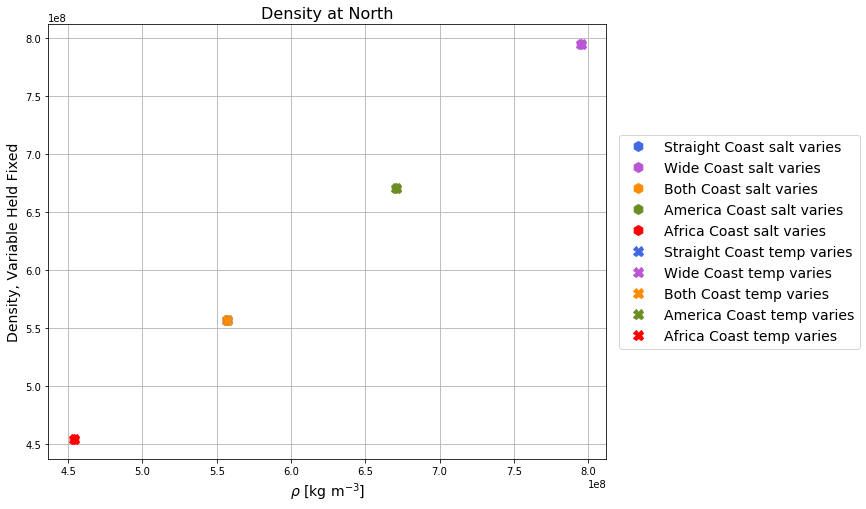

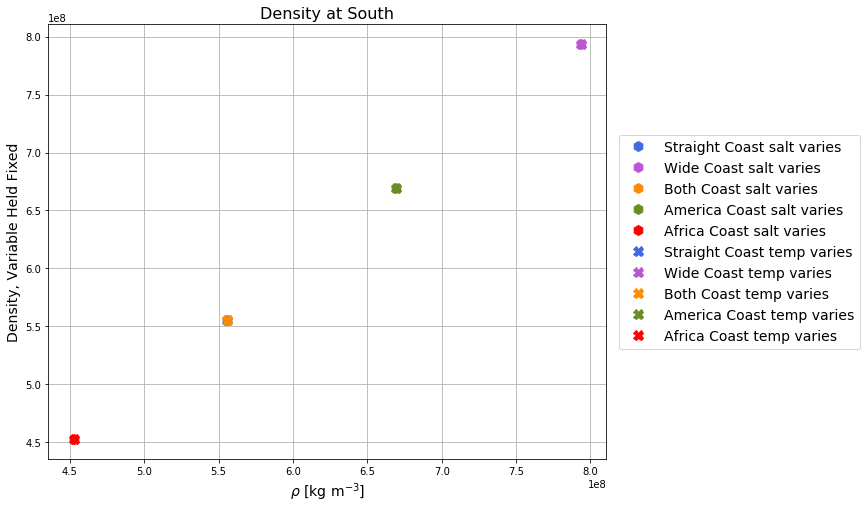

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_north_dint_straight, rho_n_dint_temp_straight.mean(dim='yh').mean(dim='xh'), 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(rho_north_dint_wide, rho_n_dint_temp_wide.mean(dim='yh').mean(dim='xh'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot( rho_north_dint_both, rho_n_dint_temp_both.mean(dim='yh').mean(dim='xh'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(rho_north_dint_am, rho_n_dint_temp_am.mean(dim='yh').mean(dim='xh'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(rho_north_dint_af, rho_n_dint_temp_af.mean(dim='yh').mean(dim='xh'),  
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(rho_north_dint_straight, rho_n_dint_salt_straight.mean(dim='yh').mean(dim='xh'), 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(rho_north_dint_wide, rho_n_dint_salt_wide.mean(dim='yh').mean(dim='xh'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(rho_north_dint_both, rho_n_dint_salt_both.mean(dim='yh').mean(dim='xh'),  
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(rho_north_dint_am, rho_n_dint_salt_am.mean(dim='yh').mean(dim='xh'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(rho_north_dint_af, rho_n_dint_salt_af.mean(dim='yh').mean(dim='xh'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))

# ax.plot([1036,1038],[1036,1038], color='gray', linestyle='dashed')

plt.grid()
# plt.ylim([1036.84,1037.14])
# plt.xlim([1036.84,1037.14])
plt.ylabel('Density, Variable Held Fixed', fontsize=14)
plt.title('Density at North', fontsize=16)
plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_south_dint_straight, rho_s_dint_temp_straight.mean(dim='yh').mean(dim='xh'), 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(rho_south_dint_wide, rho_s_dint_temp_wide.mean(dim='yh').mean(dim='xh'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot( rho_south_dint_both, rho_s_dint_temp_both.mean(dim='yh').mean(dim='xh'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(rho_south_dint_am, rho_s_dint_temp_am.mean(dim='yh').mean(dim='xh'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(rho_south_dint_af, rho_s_dint_temp_af.mean(dim='yh').mean(dim='xh'),  
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(rho_south_dint_straight, rho_s_dint_salt_straight.mean(dim='yh').mean(dim='xh'), 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(rho_south_dint_wide, rho_s_dint_salt_wide.mean(dim='yh').mean(dim='xh'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(rho_south_dint_both, rho_s_dint_salt_both.mean(dim='yh').mean(dim='xh'),  
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(rho_south_dint_am, rho_s_dint_salt_am.mean(dim='yh').mean(dim='xh'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(rho_south_dint_af, rho_s_dint_salt_af.mean(dim='yh').mean(dim='xh'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))

# ax.plot([1034,1036],[1034,1036], color='gray', linestyle='dashed')

plt.grid()
# plt.ylim([1035.01,1035.31])
# plt.xlim([1035.01,1035.31])
ax.ticklabel_format(useOffset=False)
plt.ylabel('Density, Variable Held Fixed', fontsize=14)
plt.title('Density at South', fontsize=16)
plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


In [39]:
rho_n_dint_temp_straight

<xarray.DataArray 'so' (yh: 2, xh: 2)>
array([[5.57091938e+08, 5.57069606e+08],
       [5.57112912e+08, 5.57108562e+08]])
Coordinates:
  * xh       (xh) float64 253.0 255.0
  * yh       (yh) float64 58.0 60.0
    zl       float64 1e+03
Attributes:
    units:          kg/m^3
    long_name:      potential density referenced to 2000 dbar
    standard_name:  sigma2

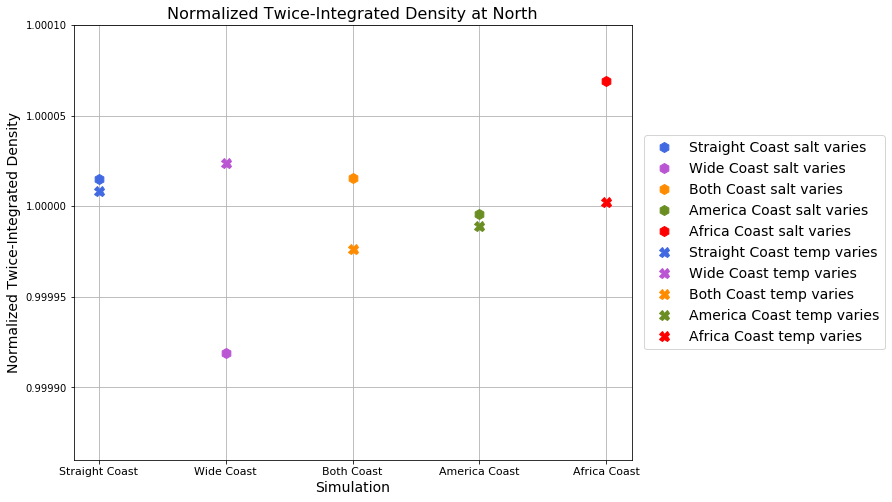

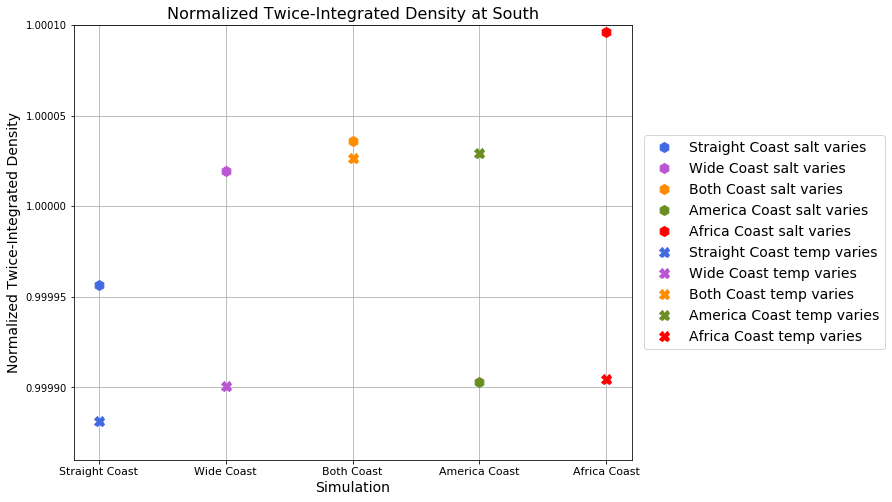

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(1, rho_n_dint_temp_straight.mean(dim='yh').mean(dim='xh')/rho_north_dint_straight, 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(2, rho_n_dint_temp_wide.mean(dim='yh').mean(dim='xh')/rho_north_dint_wide, 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot(3, rho_n_dint_temp_both.mean(dim='yh').mean(dim='xh')/rho_north_dint_both, 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(4, rho_n_dint_temp_am.mean(dim='yh').mean(dim='xh')/rho_north_dint_am, 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(5, rho_n_dint_temp_af.mean(dim='yh').mean(dim='xh')/rho_north_dint_af,  
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(1, rho_n_dint_salt_straight.mean(dim='yh').mean(dim='xh')/rho_north_dint_straight, 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(2, rho_n_dint_salt_wide.mean(dim='yh').mean(dim='xh')/rho_north_dint_wide, 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(3, rho_n_dint_salt_both.mean(dim='yh').mean(dim='xh')/rho_north_dint_both,  
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(4, rho_n_dint_salt_am.mean(dim='yh').mean(dim='xh')/rho_north_dint_am, 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(5, rho_n_dint_salt_af.mean(dim='yh').mean(dim='xh')/rho_north_dint_af, 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))

# ax.plot([1036,1038],[1036,1038], color='gray', linestyle='dashed')

plt.grid()
ax.ticklabel_format(useOffset=False)
plt.ylim([0.99986,1.00010]) #, plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
# plt.xlim([1036.84,1037.14])
plt.ylabel('Normalized Twice-Integrated Density', fontsize=14)
plt.title('Normalized Twice-Integrated Density at North', fontsize=16)
plt.xlabel('Simulation', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.xticks([1,2,3,4,5], (case_straight, case_wide, case_both, case_am, case_af), fontsize=11)
plt.show()


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(1, rho_s_dint_temp_straight.mean(dim='yh').mean(dim='xh')/rho_south_dint_straight, 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(2, rho_s_dint_temp_wide.mean(dim='yh').mean(dim='xh')/rho_south_dint_wide, 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot(3, rho_s_dint_temp_both.mean(dim='yh').mean(dim='xh')/rho_south_dint_both, 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(4, rho_s_dint_temp_am.mean(dim='yh').mean(dim='xh')/rho_south_dint_am, 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(5, rho_s_dint_temp_af.mean(dim='yh').mean(dim='xh')/rho_south_dint_af,  
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(1, rho_s_dint_salt_straight.mean(dim='yh').mean(dim='xh')/rho_south_dint_straight, 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(2, rho_s_dint_salt_wide.mean(dim='yh').mean(dim='xh')/rho_south_dint_wide, 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(3, rho_s_dint_salt_both.mean(dim='yh').mean(dim='xh')/rho_south_dint_both,  
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(4, rho_s_dint_salt_am.mean(dim='yh').mean(dim='xh')/rho_south_dint_am, 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(5, rho_s_dint_salt_af.mean(dim='yh').mean(dim='xh')/rho_south_dint_af, 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))

# ax.plot([1034,1036],[1034,1036], color='gray', linestyle='dashed')

plt.grid()
plt.ylim([0.99986,1.00010])
# plt.xlim([1035.01,1035.31])
ax.ticklabel_format(useOffset=False)
plt.ylabel('Normalized Twice-Integrated Density', fontsize=14)
plt.title('Normalized Twice-Integrated Density at South', fontsize=16)
plt.xlabel('Simulation', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.xticks([1,2,3,4,5], (case_straight, case_wide, case_both, case_am, case_af), fontsize=11)
plt.show()


In [41]:
# Northern point temp double integral
temp_north_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_wide = dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_both = dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_am = dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')

temp_n_dint_straight, temp_n_dint_depth_straight = double_integration(temp_north_straight[::-1])

temp_n_dint_wide, temp_n_dint_depth_wide = double_integration(temp_north_wide[::-1])

temp_n_dint_both, temp_n_dint_depth_both = double_integration(temp_north_both[::-1])

temp_n_dint_am, temp_n_dint_depth_am = double_integration(temp_north_am[::-1])

temp_n_dint_af, temp_n_dint_depth_af = double_integration(temp_north_af[::-1])

# Southern point temp double integral
temp_south_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_south_wide =dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_both = dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_am = dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')

temp_s_dint_straight, temp_s_dint_depth_straight = double_integration(temp_south_straight[::-1])

temp_s_dint_wide, temp_s_dint_depth_wide = double_integration(temp_south_wide[::-1])

temp_s_dint_both, temp_s_dint_depth_both = double_integration(temp_south_both[::-1])

temp_s_dint_am, temp_s_dint_depth_am = double_integration(temp_south_am[::-1])

temp_s_dint_af, temp_s_dint_depth_af = double_integration(temp_south_af[::-1])


In [42]:
# Northern point salt double integral
salt_north_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_wide = dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_both = dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_am = dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')

salt_n_dint_straight, salt_n_dint_depth_straight = double_integration(salt_north_straight[::-1])

salt_n_dint_wide, salt_n_dint_depth_wide = double_integration(salt_north_wide[::-1])

salt_n_dint_both, salt_n_dint_depth_both = double_integration(salt_north_both[::-1])

salt_n_dint_am, salt_n_dint_depth_am = double_integration(salt_north_am[::-1])

salt_n_dint_af, salt_n_dint_depth_af = double_integration(salt_north_af[::-1])

# Southern point salt double integral
salt_south_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_south_wide =dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_both = dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_am = dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')

salt_s_dint_straight, salt_s_dint_depth_straight = double_integration(salt_south_straight[::-1])

salt_s_dint_wide, salt_s_dint_depth_wide = double_integration(salt_south_wide[::-1])

salt_s_dint_both, salt_s_dint_depth_both = double_integration(salt_south_both[::-1])

salt_s_dint_am, salt_s_dint_depth_am = double_integration(salt_south_am[::-1])

salt_s_dint_af, salt_s_dint_depth_af = double_integration(salt_south_af[::-1])

ValueError: x and y must have same first dimension, but have shapes (0,) and (21,)

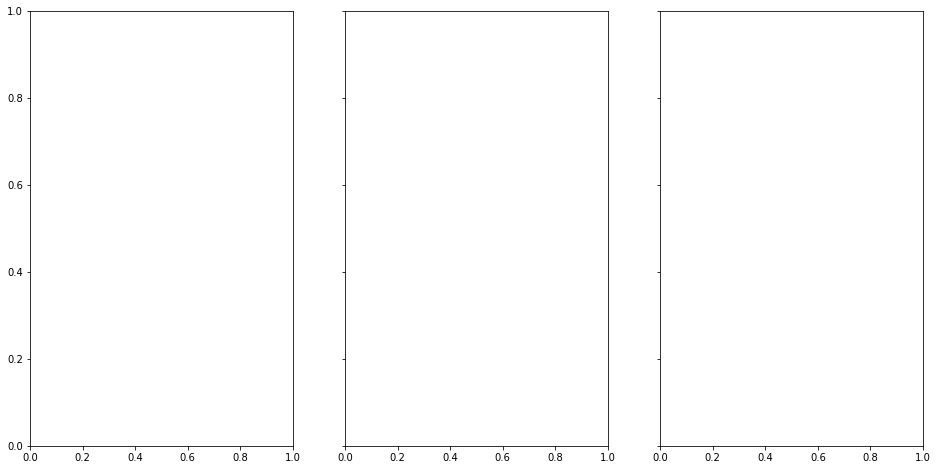

In [43]:
mean_rho_north = (rho_n_dint_straight.sel(zl=slice(0,1200))+
                 rho_n_dint_wide.sel(zl=slice(0,1200))+
                 rho_n_dint_both.sel(zl=slice(0,1200))+
                 rho_n_dint_am.sel(zl=slice(0,1200))+
                 rho_n_dint_af.sel(zl=slice(0,1200)))/5

mean_temp_north = (temp_n_dint_straight.sel(zl=slice(0,1200))+
                 temp_n_dint_wide.sel(zl=slice(0,1200))+
                 temp_n_dint_both.sel(zl=slice(0,1200))+
                 temp_n_dint_am.sel(zl=slice(0,1200))+
                 temp_n_dint_af.sel(zl=slice(0,1200)))/5

mean_salt_north = (salt_n_dint_straight.sel(zl=slice(0,1200))+
                 salt_n_dint_wide.sel(zl=slice(0,1200))+
                 salt_n_dint_both.sel(zl=slice(0,1200))+
                 salt_n_dint_am.sel(zl=slice(0,1200))+
                 salt_n_dint_af.sel(zl=slice(0,1200)))/5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_n_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[0].plot(rho_n_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[0].plot(rho_n_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[0].plot(rho_n_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[0].plot(rho_n_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[0].set_xlabel('Twice-integrated Density at north [kg m$^{-3}$]', fontsize=14)

ax[1].plot(temp_n_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[1].plot(temp_n_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[1].plot(temp_n_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[1].plot(temp_n_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[1].plot(temp_n_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[1].invert_xaxis()
ax[1].set_xlabel('Twice-integrated Temperature at north [$^{\circ}$C]', fontsize=14)

ax[2].plot(salt_n_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[2].plot(salt_n_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[2].plot(salt_n_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[2].plot(salt_n_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[2].plot(salt_n_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[2].set_xlabel('Twice-integrated Salinity at north [psu]', fontsize=14)

# plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

# Normalized by mean
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_n_dint_straight.sel(zl=slice(0,1200))-mean_rho_north,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[0].plot(rho_n_dint_wide.sel(zl=slice(0,1200))-mean_rho_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[0].plot(rho_n_dint_both.sel(zl=slice(0,1200))-mean_rho_north, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[0].plot(rho_n_dint_am.sel(zl=slice(0,1200))-mean_rho_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[0].plot(rho_n_dint_af.sel(zl=slice(0,1200))-mean_rho_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[0].set_xlabel('Normalized Twice-integrated Density at north [kg m$^{-3}$]', fontsize=14)

ax[1].plot(temp_n_dint_straight.sel(zl=slice(0,1200))-mean_temp_north,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[1].plot(temp_n_dint_wide.sel(zl=slice(0,1200))-mean_temp_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[1].plot(temp_n_dint_both.sel(zl=slice(0,1200))-mean_temp_north, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[1].plot(temp_n_dint_am.sel(zl=slice(0,1200))-mean_temp_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[1].plot(temp_n_dint_af.sel(zl=slice(0,1200))-mean_temp_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[1].invert_xaxis()
ax[1].set_xlabel('Normalized Twice-integrated Temperature at north [$^{\circ}$C]', fontsize=14)

ax[2].plot(salt_n_dint_straight.sel(zl=slice(0,1200))-mean_salt_north,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[2].plot(salt_n_dint_wide.sel(zl=slice(0,1200))-mean_salt_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[2].plot(salt_n_dint_both.sel(zl=slice(0,1200))-mean_salt_north, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[2].plot(salt_n_dint_am.sel(zl=slice(0,1200))-mean_salt_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[2].plot(salt_n_dint_af.sel(zl=slice(0,1200))-mean_salt_north, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[2].set_xlabel('Normalized Twice-integrated Salinity at north [psu]', fontsize=14)

# plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

mean_rho_south = (rho_s_dint_straight.sel(zl=slice(0,1200))+
                 rho_s_dint_wide.sel(zl=slice(0,1200))+
                 rho_s_dint_both.sel(zl=slice(0,1200))+
                 rho_s_dint_am.sel(zl=slice(0,1200))+
                 rho_s_dint_af.sel(zl=slice(0,1200)))/5

mean_temp_south = (temp_s_dint_straight.sel(zl=slice(0,1200))+
                 temp_s_dint_wide.sel(zl=slice(0,1200))+
                 temp_s_dint_both.sel(zl=slice(0,1200))+
                 temp_s_dint_am.sel(zl=slice(0,1200))+
                 temp_s_dint_af.sel(zl=slice(0,1200)))/5

mean_salt_south = (salt_s_dint_straight.sel(zl=slice(0,1200))+
                 salt_s_dint_wide.sel(zl=slice(0,1200))+
                 salt_s_dint_both.sel(zl=slice(0,1200))+
                 salt_s_dint_am.sel(zl=slice(0,1200))+
                 salt_s_dint_af.sel(zl=slice(0,1200)))/5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_s_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[0].plot(rho_s_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[0].plot(rho_s_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[0].plot(rho_s_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[0].plot(rho_s_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[0].set_xlabel('Twice-integrated Density at south [kg m$^{-3}$]', fontsize=14)

ax[1].plot(temp_s_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[1].plot(temp_s_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[1].plot(temp_s_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[1].plot(temp_s_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[1].plot(temp_s_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[1].invert_xaxis()
ax[1].set_xlabel('Twice-integrated Temperature at south [$^{\circ}$C]', fontsize=14)

ax[2].plot(salt_s_dint_straight.sel(zl=slice(0,1200)),
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[2].plot(salt_s_dint_wide.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[2].plot(salt_s_dint_both.sel(zl=slice(0,1200)), dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[2].plot(salt_s_dint_am.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[2].plot(salt_s_dint_af.sel(zl=slice(0,1200)), dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[2].set_xlabel('Twice-integrated Salinity at south [psu]', fontsize=14)

# Normalized by mean value at south
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_s_dint_straight.sel(zl=slice(0,1200))-mean_rho_south,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[0].plot(rho_s_dint_wide.sel(zl=slice(0,1200))-mean_rho_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[0].plot(rho_s_dint_both.sel(zl=slice(0,1200))-mean_rho_south, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[0].plot(rho_s_dint_am.sel(zl=slice(0,1200))-mean_rho_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[0].plot(rho_s_dint_af.sel(zl=slice(0,1200))-mean_rho_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[0].set_xlabel('Normalized Twice-integrated Density at south [kg m$^{-3}$]', fontsize=14)

ax[1].plot(temp_s_dint_straight.sel(zl=slice(0,1200))-mean_temp_south,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[1].plot(temp_s_dint_wide.sel(zl=slice(0,1200))-mean_temp_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[1].plot(temp_s_dint_both.sel(zl=slice(0,1200))-mean_temp_south, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[1].plot(temp_s_dint_am.sel(zl=slice(0,1200))-mean_temp_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[1].plot(temp_s_dint_af.sel(zl=slice(0,1200))-mean_temp_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[1].invert_xaxis()
ax[1].set_xlabel('Normalized Twice-integrated Temperature at south [$^{\circ}$C]', fontsize=14)

ax[2].plot(salt_s_dint_straight.sel(zl=slice(0,1200))-mean_salt_south,
           dy_straight.zl.sel(zl=slice(0,1200)), 
           color='royalblue', label=case_straight)
ax[2].plot(salt_s_dint_wide.sel(zl=slice(0,1200))-mean_salt_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='mediumorchid', label=case_wide)
ax[2].plot(salt_s_dint_both.sel(zl=slice(0,1200))-mean_salt_south, dy_both.zl.sel(zl=slice(0,1200)), 
           color='darkorange', label=case_both)
ax[2].plot(salt_s_dint_am.sel(zl=slice(0,1200))-mean_salt_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='olivedrab', label=case_am)
ax[2].plot(salt_s_dint_af.sel(zl=slice(0,1200))-mean_salt_south, dy_wide.zl.sel(zl=slice(0,1200)), 
           color='r', label=case_af)
ax[2].set_xlabel('Normalized Twice-integrated Salinity at south [psu]', fontsize=14)


# plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.ylim([0,1200])
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))

ax[0].plot(rho_n_dint_straight, rho_n_dint_straight.zl, 
           color='royalblue', label=case_straight)
ax[0].plot(rho_n_dint_wide, rho_n_dint_wide.zl, 
           color='mediumorchid', label=case_wide)
ax[0].plot(rho_n_dint_both, rho_n_dint_both.zl, 
           color='darkorange', label=case_both)
ax[0].plot(rho_n_dint_am, rho_n_dint_am.zl, 
           color='olivedrab', label=case_am)
ax[0].plot(rho_n_dint_af, rho_n_dint_af.zl, 
           color='r', label=case_af)
ax[0].set_xlabel('Twice-integrated Density at north [kg m$^{-1}$]', fontsize=14)


ax[1].plot(rho_s_dint_straight, rho_s_dint_straight.zl, 
           color='royalblue', label=case_straight)
ax[1].plot(rho_s_dint_wide, rho_s_dint_wide.zl, 
           color='mediumorchid', label=case_wide)
ax[1].plot(rho_s_dint_both, rho_s_dint_both.zl, 
           color='darkorange', label=case_both)
ax[1].plot(rho_s_dint_am, rho_s_dint_am.zl, 
           color='olivedrab', label=case_am)
ax[1].plot(rho_s_dint_af, rho_s_dint_af.zl, 
           color='r', label=case_af)
ax[1].set_xlabel('Twice-integrated Density at south [kg m$^{-1}$]', fontsize=14)

ax[2].plot(rho_n_dint_straight-rho_s_dint_straight, rho_n_dint_straight.zl, 
           color='royalblue', label=case_straight)
ax[2].plot(rho_n_dint_wide-rho_s_dint_wide, rho_n_dint_wide.zl, 
           color='mediumorchid', label=case_wide)
ax[2].plot(rho_n_dint_both-rho_s_dint_both, rho_n_dint_both.zl, 
           color='darkorange', label=case_both)
ax[2].plot(rho_n_dint_am-rho_s_dint_am, rho_n_dint_am.zl, 
           color='olivedrab', label=case_am)
ax[2].plot(rho_n_dint_af-rho_s_dint_af, rho_n_dint_af.zl, 
           color='r', label=case_af)
ax[2].set_xlabel('Twice-integrated Density Difference [kg m$^{-1}$]', fontsize=14)

plt.ylim([0,4600])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
rho_n_dint_straight.plot()

In [ ]:
plt.plot(1, rho_north_dint_straight/rho_north_dint_straight,
         's', color='royalblue', markersize=10, label='{} '.format(case_straight))
plt.plot(1, rho_n_dint_temp_straight/rho_north_dint_straight,
        'P', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
plt.plot(1, rho_n_dint_salt_straight/rho_north_dint_straight,
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
plt.show()

plt.plot(2, rho_north_dint_wide/rho_north_dint_wide,
        's', color='mediumorchid', markersize=10, label='{} '.format(case_wide))
plt.plot(2, rho_n_dint_temp_wide/rho_north_dint_wide,
        'P', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
plt.plot(2, rho_n_dint_salt_wide/rho_north_dint_wide,
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
plt.show()


plt.plot(2, rho_north_dint_both/rho_north_dint_both,
        's', color='darkorange', markersize=10, label='{} '.format(case_both))
plt.plot(2, rho_n_dint_temp_both/rho_north_dint_both,
        'P', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
plt.plot(2, rho_n_dint_salt_both/rho_north_dint_both,
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
plt.show()

plt.plot(2, rho_north_dint_am/rho_north_dint_am,
        's', color='olivedrab', markersize=10, label='{} '.format(case_am))
plt.plot(2, rho_n_dint_temp_am/rho_north_dint_am,
        'P', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
plt.plot(2, rho_n_dint_salt_am/rho_north_dint_am,
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
plt.show()

plt.plot(2, rho_north_dint_af/rho_north_dint_af,
        's', color='r', markersize=10, label='{} '.format(case_af))
plt.plot(2, rho_n_dint_temp_af/rho_north_dint_af,
        'P', color='r', markersize=10, label='{} salt varies'.format(case_af))
plt.plot(2, rho_n_dint_salt_af/rho_north_dint_af,
        'X', color='r', markersize=10, label='{} teafp varies'.format(case_af))
plt.show()

In [ ]:
plt.plot(1, rho_south_dint_straight/rho_south_dint_straight,
         's', color='royalblue', markersize=10, label='{} '.format(case_straight))
plt.plot(1, rho_s_dint_temp_straight/rho_south_dint_straight,
        'P', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
plt.plot(1, rho_s_dint_salt_straight/rho_south_dint_straight,
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
plt.show()

plt.plot(2, rho_south_dint_wide/rho_south_dint_wide,
        's', color='mediumorchid', markersize=10, label='{} '.format(case_wide))
plt.plot(2, rho_s_dint_temp_wide/rho_south_dint_wide,
        'P', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
plt.plot(2, rho_s_dint_salt_wide/rho_south_dint_wide,
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
plt.show()


plt.plot(2, rho_south_dint_both/rho_south_dint_both,
        's', color='darkorange', markersize=10, label='{} '.format(case_both))
plt.plot(2, rho_s_dint_temp_both/rho_south_dint_both,
        'P', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
plt.plot(2, rho_s_dint_salt_both/rho_south_dint_both,
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
plt.show()

plt.plot(2, rho_south_dint_am/rho_south_dint_am,
        's', color='olivedrab', markersize=10, label='{} '.format(case_am))
plt.plot(2, rho_s_dint_temp_am/rho_south_dint_am,
        'P', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
plt.plot(2, rho_s_dint_salt_am/rho_south_dint_am,
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
plt.show()

plt.plot(2, rho_south_dint_af/rho_south_dint_af,
        's', color='r', markersize=10, label='{} '.format(case_af))
plt.plot(2, rho_s_dint_temp_af/rho_south_dint_af,
        'P', color='r', markersize=10, label='{} salt varies'.format(case_af))
plt.plot(2, rho_s_dint_salt_af/rho_south_dint_af,
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))
plt.legend()
plt.show()

In [ ]:
north_array_salt_varies = np.array([[rho_north_dint_straight, 
           rho_north_dint_wide, 
           rho_north_dint_both, 
           rho_north_dint_am, 
           rho_north_dint_af],
          [rho_n_dint_temp_straight, 
           rho_n_dint_temp_wide, 
           rho_n_dint_temp_both,
           rho_n_dint_temp_am,
           rho_n_dint_temp_af]])
print('Northern density correlation to northern density with temperature held fixed:')
north_salt_varies_corrcoefs = np.corrcoef(north_array_salt_varies)
print(north_salt_varies_corrcoefs[0,1])
print(' ')

north_array_temp_varies = np.array([[rho_north_dint_straight, 
           rho_north_dint_wide, 
           rho_north_dint_both, 
           rho_north_dint_am, 
           rho_north_dint_af],
          [rho_n_dint_salt_straight,
           rho_n_dint_salt_wide,
           rho_n_dint_salt_both,
           rho_n_dint_salt_am, 
           rho_n_dint_salt_af]])
print('Northern density correlation to northern density with salinity held fixed:')
north_temp_varies_corrcoefs = np.corrcoef(north_array_temp_varies)
print(north_temp_varies_corrcoefs[0,1])

In [ ]:
south_array_salt_varies = np.array([[rho_south_dint_straight, 
           rho_south_dint_wide, 
           rho_south_dint_both, 
           rho_south_dint_am, 
           rho_south_dint_af],
          [rho_s_dint_temp_straight, 
           rho_s_dint_temp_wide, 
           rho_s_dint_temp_both,
           rho_s_dint_temp_am,
           rho_s_dint_temp_af]])
print('Southern density correlation to southern density with temperature held fixed:')
south_salt_varies_corrcoefs = np.corrcoef(south_array_salt_varies)
print(south_salt_varies_corrcoefs[0,1])
print(' ')

south_array_temp_varies = np.array([[rho_south_dint_straight, 
           rho_south_dint_wide, 
           rho_south_dint_both, 
           rho_south_dint_am, 
           rho_south_dint_af],
          [rho_s_dint_salt_straight,
           rho_s_dint_salt_wide,
           rho_s_dint_salt_both,
           rho_s_dint_salt_am, 
           rho_s_dint_salt_af]])
print('Southern density correlation to southern density with salinity held fixed:')
south_temp_varies_corrcoefs = np.corrcoef(south_array_temp_varies)
print(south_temp_varies_corrcoefs[0,1])

In [ ]:
fig, ax = plt.subplots(figsize=(2,2))

# ax.plot(rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
#         rho_salt_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
#         's', color='royalblue', markersize=10, label='{}'.format(case_straight))
# ax.plot(rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
#         rho_salt_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
#         's', color='mediumorchid', markersize=10, label='{}'.format(case_wide))
# ax.plot(rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
#         rho_salt_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
#         's', color='darkorange', markersize=10, label='{}'.format(case_both))
# ax.plot(rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
#         rho_salt_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
#         's', color='olivedrab', markersize=10, label='{}'.format(case_am))
# ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
#         rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
#         's', color='r', markersize=10, label='{}'.format(case_af))

ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='k', markersize=10, label='Salt varies, temperature held fixed')
ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='k', markersize=10, label='Temperature varies, salt held fixed')

plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()
